# Initial EDA

This notebook collects initial insights about the chosen dataset, namely columns investigation, missing values inspection.

In [79]:
import os
import sys
import pandas as pad
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(os.path.join('..', 'data', 'raw', 'ubaar-competition', 'train.csv'), encoding="utf-8", index_col="ID")

In [3]:
data.head()

,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight,price
ID,,,,,,,,,,,,,
88142929797,960218,36.666045,48.489706,زنجان,29.600574,52.537114,فارس,1092.0,751.0,treili,kafi,20.00,15300000
30842979862,960511,32.323951,50.855412,چهارمحال و بختیاری,34.644923,50.876092,قم,414.0,264.0,khavar,mosaghaf_felezi,2.50,1800000
54262798716,960602,32.575448,51.581011,اصفهان,31.819508,49.865235,خوزستان,310.0,292.0,joft,kompressi,14.97,3742000
64071173752,960319,35.029685,48.085763,کردستان,35.703801,51.398824,تهران,391.0,271.0,khavar,mosaghaf_felezi,2.50,1300000
68088966447,960609,31.586965,54.449607,یزد,36.730367,53.965480,گلستان,756.0,573.0,joft,bari,15.00,8870000


In [74]:
data.shape

(50000, 13)

We have 50k observations with 13 columns. Columns names are descriptive. 

# Checking missing values

In [4]:
data.isna().sum()

date                    0
sourceLatitude          0
sourceLongitude         0
SourceState             0
destinationLatitude     0
destinationLongitude    0
destinationState        0
distanceKM              3
taxiDurationMin         3
vehicleType             0
vehicleOption           0
weight                  0
price                   0
dtype: int64

# `date` column

In [5]:
import jdatetime

def convert_data_to_gregorian(date):
    date = str(date)
    
    return jdatetime.date(1300+int(date[:2]), int(date[2:4]), int(date[4:6])).togregorian().strftime('%Y-%m-%d')
    
data['date'] = data['date'].apply(convert_data_to_gregorian).astype("datetime64")

<AxesSubplot:xlabel='date'>

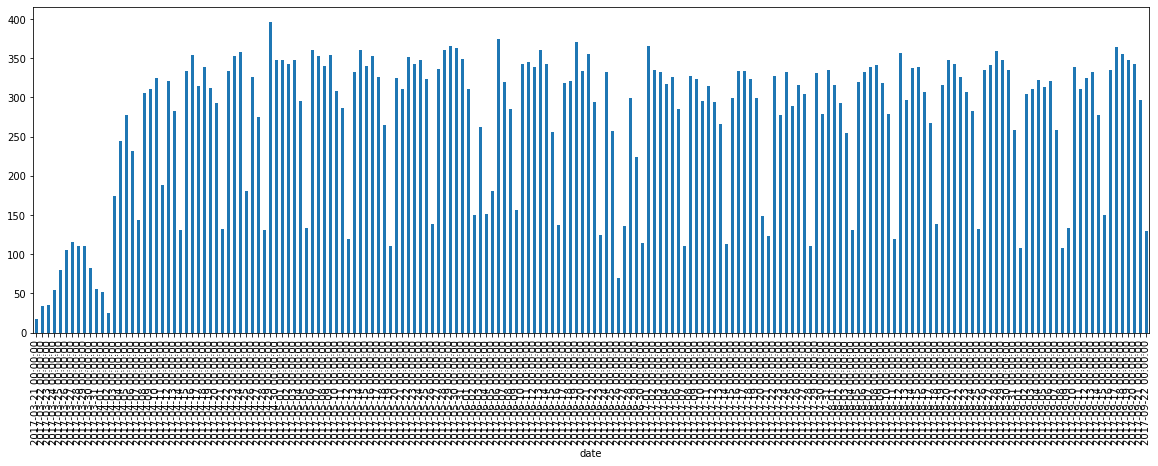

In [24]:
fig, ax = plt.subplots(figsize = (20,6))
data['date'].groupby(data["date"]).count().plot(kind="bar")

# Latitudes

Latitudes are important. They may be correlated with distances but Iran is mountainous and it may not be that simple. 
Also, the economical status of a state may influence the price

Therefore it would be beneficial to encode latitudes in some meaningful feature.

In [78]:
# `sourceLatitude`, `sourceLongitude`, 'destinationLatitude', 'destinationLongitude'

# SourceState column

In [16]:
len(np.unique(data["SourceState"]))

31

<AxesSubplot:xlabel='count', ylabel='destinationState'>

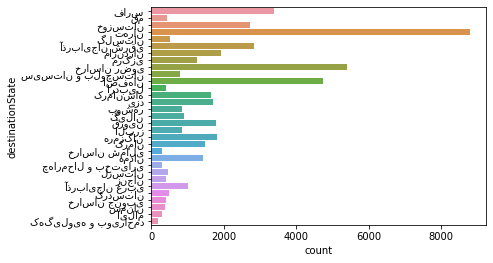

In [22]:
sns.countplot(data=data, y='destinationState')

# destinationState column

In [20]:
len(np.unique(data["destinationState"]))

31

<AxesSubplot:xlabel='count', ylabel='destinationState'>

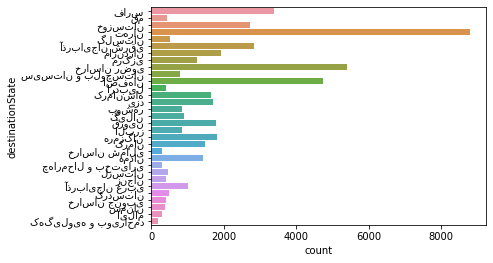

In [21]:
sns.countplot(data=data, y='destinationState')

# `distanceKM` and `taxiDurationMin`

Both variables have missing data. Let's check it

In [25]:
data[data['distanceKM'].isna()]

,date,sourceLatitude,sourceLongitude,SourceState,destinationLatitude,destinationLongitude,destinationState,distanceKM,taxiDurationMin,vehicleType,vehicleOption,weight,price
ID,,,,,,,,,,,,,
79421499936,2017-04-17,37.280551,49.586155,گیلان,38.080153,46.296114,آذربایجان شرقی,NaN,NaN,khavar,hichkodam,4.50,4300000
67133186102,2017-06-18,37.476449,49.369495,گیلان,31.328880,48.673074,خوزستان,NaN,NaN,treili,kafi,23.26,18500000
17183110848,2017-07-06,35.698837,51.385724,تهران,38.413859,48.873461,گیلان,NaN,NaN,tak,bari,3.00,4600000


Missing features contain the same rows. It does not look like it is related to any other variable in the dataset. These features may be important so we have 3 possibilities:
- Remove the rows because there are only 3 of them
- Replace nans with a mean value 
- Interpolate Nans with the values based on source-destination latitudes/longitudes.

In [80]:
data['distanceKM'].fillna(data['distanceKM'].median(), inplace=True)
data['taxiDurationMin'].fillna(data['taxiDurationMin'].median(), inplace=True)

Then it may be a good idea to plot these variables together beacuse they may be correlated

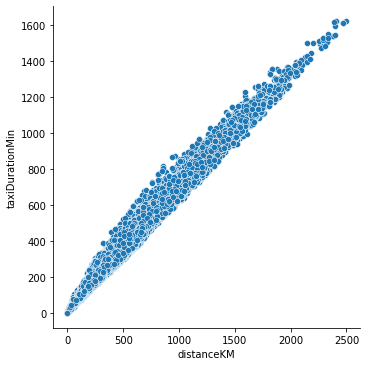

In [36]:
sns.relplot(x="distanceKM", y="taxiDurationMin", data=data);

# `vehicleType` and `vehicleOption` columns

<AxesSubplot:xlabel='count', ylabel='vehicleType'>

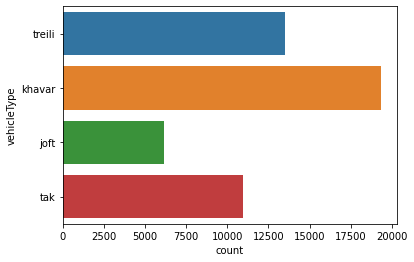

In [32]:
sns.countplot(data=data, y='vehicleType')

<AxesSubplot:xlabel='count', ylabel='vehicleOption'>

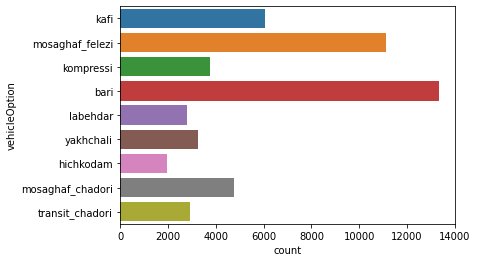

In [33]:
sns.countplot(data=data, y='vehicleOption')

None of the values seem to be neglectable nor dominant.

Maybe vehicle type can be correlated with weight? 

<AxesSubplot:xlabel='vehicleType', ylabel='weight'>

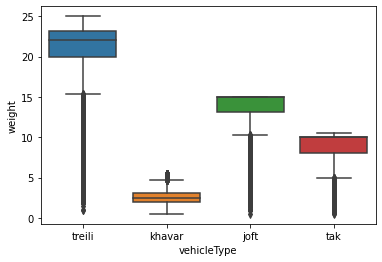

In [83]:
sns.boxplot(data=data, x='vehicleType', y='weight')

<AxesSubplot:xlabel='vehicleOption', ylabel='weight'>

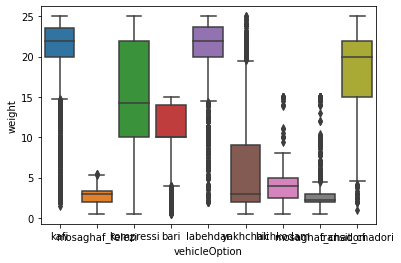

In [84]:
sns.boxplot(data=data, x='vehicleOption', y='weight')

Both variables are correlated with weight. Can we see anything similar with trip length?

<AxesSubplot:xlabel='vehicleOption', ylabel='distanceKM'>

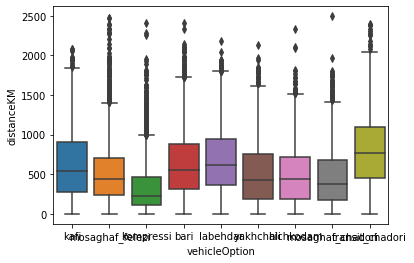

In [85]:
sns.boxplot(data=data, x='vehicleOption', y='distanceKM')

<AxesSubplot:xlabel='vehicleType', ylabel='distanceKM'>

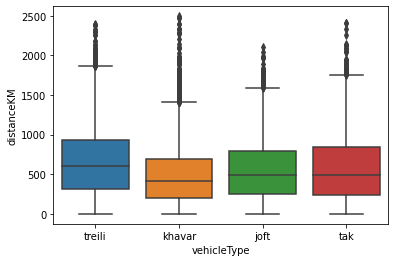

In [86]:
sns.boxplot(data=data, x='vehicleType', y='distanceKM')

Not really, all vehicles can ride long and short distances but not all can transport heavy loads.

# Weight 

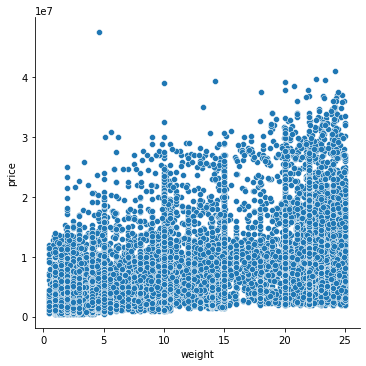

In [38]:
sns.relplot(x="weight", y="price", data=data);

Weight and price variables are not really correlated. Let's take a look at them separately

<AxesSubplot:xlabel='weight', ylabel='Count'>

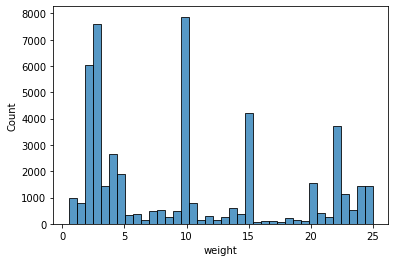

In [44]:
sns.histplot(data=data, x='weight')

Weights are interesting because the distribution has four peaks and is not smooth

<AxesSubplot:xlabel='price', ylabel='Count'>

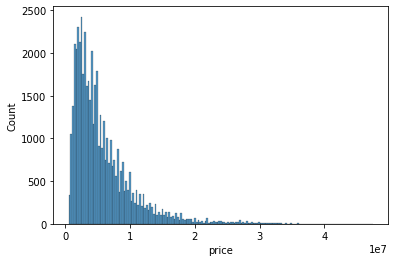

In [42]:
sns.histplot(data=data, x='price')

`Price` is fairly typical with not as many high values as low values.

However, because we are going to predict this variable we must take into consideration the fact that extreme values will be hard to model. Let's check how many transports cost more than 30000000 rials. 

In [55]:
n = 20000000
print(f"Transactions more expensive than {n} rials: {len(data[data['price'] > n])* 100 / len(data)}%")

Transactions more expensive than 20000000 rials: 1.866%


Let's visualize it on boxplot to see quantiles:

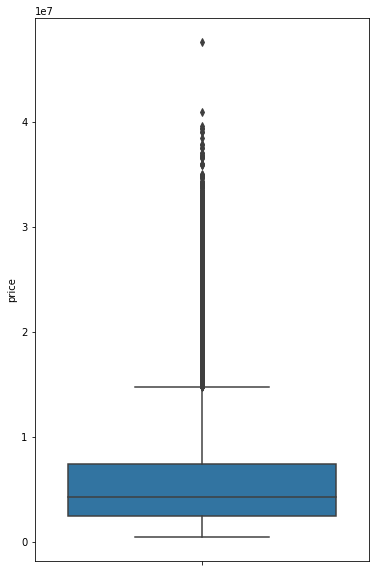

In [71]:
plt.figure(figsize=(6,10))
sns.boxplot(data=data, y='price') #.set_yscale('log')
plt.show()


Half of the prices are in the range 350k-750k, and the q90 is around 1.6M. This will definitely impact model quality.